In [3]:
"""
=====================================
Test SVM with custom Gaussian kernels
=====================================


Author: Eric Eaton, 2014

Adapted from scikit_learn documentation.

"""
print(__doc__)

from numpy import loadtxt, ones, zeros, where
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from svmKernels import myGaussianKernel
from svmKernels import _gaussSigma

# import some data to play with

filename = 'data/svmTuningData.dat'
data = loadtxt(filename, delimiter=',')
X_raw = data[:, 0:-1]
Y_raw = np.squeeze(np.array([data[:, 2]]).T)
m, d = X_raw.shape
#print(m,d)

print("Training the SVMs...")

trials = 2
folds = 10
fold_size = m//folds
train_size = fold_size * (folds - 1)
#print(fold_size, train_size)
validation_size = fold_size



# Best parameters
best=[0,0,0]

# Search parameters through a grid 
#TO DO: CHANGE THIS PART

sigma_vals = 10**np.arange(-3., 5.)
C_vals = np.linspace(1,100, num=100)

for c in range(0,100):
    for g in range(0,8):
        C = C_vals[c]
        _gaussSigma = sigma_vals[g]
        accuracy = 0
    
        for t  in range(0,trials):  
        
            #randomize the data set
            p = np.random.permutation(m)
            order = p[0:m]
            X = X_raw[order,:]
            Y = Y_raw[order]

            for f in range(0,folds):

                #cross validation: get train set and test set   
                # TO DO 
                # You need to finish the following for cross validation
                X_train = X
                Y_train = Y
                X_test = X
                Y_test = Y

                # create an instance of SVM with build in RBF kernel and train it
                equivalentGamma = 1.0 / (2 * _gaussSigma ** 2)
                model = svm.SVC(C=C, kernel='rbf', gamma=equivalentGamma)
                model.fit(X_train, Y_train)

                predictions_test = model.predict(np.c_[X_test[:,0],X_test[:,1]])
                a = np.mean(Y_test==predictions_test)
                accuracy += a

            
            # Best Accuracy So Far
            average_accuracy = accuracy/(folds*trials)
            if average_accuracy > best[2]:
                best[0] = C
                best[1] = _gaussSigma
                best[2] = average_accuracy
            

print(best)      


Test SVM with custom Gaussian kernels


Author: Eric Eaton, 2014

Adapted from scikit_learn documentation.


Training the SVMs...
[1.0, 0.001, 1.0]


The best parameters are:  [1.0, 0.001, 1.0]


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_8182/2250466908.py:24: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, predictions, cmap="Paired")


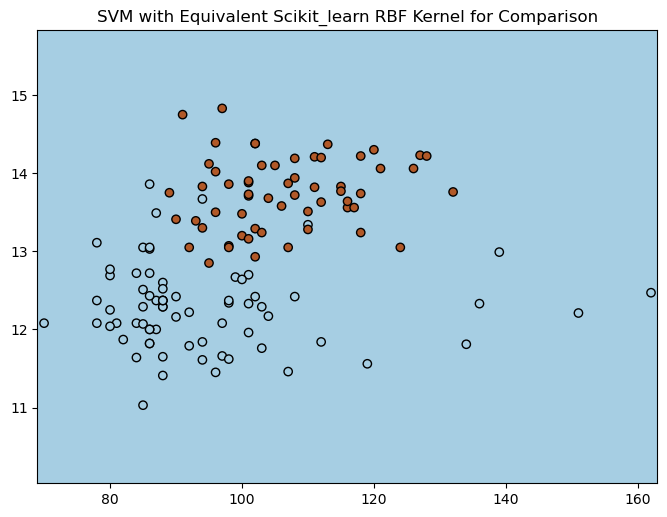

In [4]:
# create an instance of SVM with build in RBF kernel and train it
print("The best parameters are: ", best)
C = best[0]
_gaussSigma = best[1]
equivalentGamma = 1.0 / (2 * _gaussSigma ** 2)
model = svm.SVC(C=C, kernel='rbf', gamma=equivalentGamma)
model.fit(X, Y)

h = .02  # step size in the mesh

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


predictions = model.predict(np.c_[xx.ravel(), yy.ravel()])
predictions = predictions.reshape(xx.shape)

# plot my results
plt.figure(figsize=(8, 6), dpi=100)

plt.pcolormesh(xx, yy, predictions, cmap="Paired")
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap="Paired", edgecolors="black")  # Plot the training points
plt.title('SVM with Equivalent Scikit_learn RBF Kernel for Comparison')
plt.axis('tight')

plt.show()

 Report optimal values and the corresponding estimated accuracy. And explain how you find those optimal values.
 